In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import itertools

## Load data

In [2]:
df1 = pd.read_csv('data/Total_Renewable_Energy_Consumption_Monthly.csv',skiprows=4,index_col='Month',parse_dates=True)
df1.columns = ['total-renewable-energy-monthly']
df1 = df1.sort_index()
df1.head()

,total-renewable-energy-monthly
Month,
1973-01-01,403.981
1973-02-01,360.900
1973-03-01,400.161
1973-04-01,380.470
1973-05-01,392.141


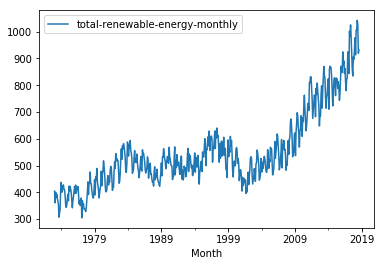

In [3]:
df1.plot()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 1973-01-01 to 2018-08-01
Data columns (total 1 columns):
total-renewable-energy-monthly    548 non-null float64
dtypes: float64(1)
memory usage: 8.6 KB


## Split data

In [5]:
train = pd.DataFrame(df1.iloc[:385,0])
test = pd.DataFrame(df1.iloc[385:,0])

## Find parameter for SARIMA model

In [6]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [7]:
import statsmodels.api as sm
warnings.filterwarnings("ignore")
v_aic=[]
v_pdq=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            v_pdq.append([param, param_seasonal])
            v_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5843.038521612623
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5218.872378990421
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:4706.323832156222
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3853.1737502152064
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3720.4826148257034
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:3605.728546578751
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:4044.955376904895
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:3650.787294912554
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:3520.8701102176874
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3864.1665182115853
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3840.215091185758
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:3720.0513686813283
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3732.885958240394
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3722.3017307264054
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:3590.198562212992
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:3799.623397234765
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:3643.283014235113
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:3514.24841387628
ARIMA

ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:3109.818160150147
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:3079.4007584047013
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:3772.9224009099053
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:3523.0373174882016
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:3369.865525642712
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:3434.084892451343
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:3204.2609763055952
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:3097.8689660315767
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:3695.814946826844
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:3260.237570696236
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:3059.315200229521
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:3416.00303093621
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:3314.5807332715567
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:3203.1479089127834
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:3281.0346230012738
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:3203.4668171907874
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:3099.8137635783364
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:3425.7537835999383


ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:3229.1572456529398
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:3308.327012107988
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:3229.698194546799
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:3122.2951258990643
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:3458.5948491519625
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:3245.4289269643596
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:3088.1480243967517
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:3285.891965930772
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:3242.6929121986914
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:3229.552286560309
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:3176.9330862581983
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:3133.8339122163293
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:3123.9779201243823
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:3256.3345135235595
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:3120.570022422583
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:3090.094300122917
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:3777.8670666912385
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:3524.155453744958

ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:3224.5109473279854
ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:3087.274368030525
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:3067.612280655962
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:3750.068163546962
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:3526.331493499981
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:3357.8567691542644
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:3450.68606928167
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:3208.9633181652316
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:3103.322859438994
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:3718.843458734037
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:3290.2578398658416
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:3065.093745575313
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:3398.7587721785585
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:3319.3849367710955
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:3208.883730191977
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:3271.6877910209987
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:3208.0829298074104
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:3103.9048382247806
AR

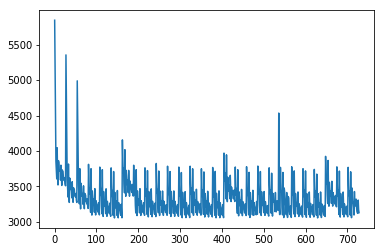

In [8]:
plt.plot(v_aic)

In [9]:
min(v_aic)

3056.351943773502

In [10]:
np.argmin(v_aic)

143

In [11]:
v_pdq[143]

[(0, 1, 2), (0, 2, 2, 12)]

## ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:4577.449459188483

In [12]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 2),
                                seasonal_order=(0, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1987      0.050     -4.007      0.000      -0.296      -0.101
ma.L2         -0.2068      0.049     -4.208      0.000      -0.303      -0.110
ma.S.L12      -1.7384    311.780     -0.006      0.996    -612.816     609.339
ma.S.L24       0.7384    230.244      0.003      0.997    -450.531     452.008
sigma2       473.3046   1.48e+05      0.003      0.997   -2.89e+05     2.9e+05


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:     total-renewable-energy-monthly   No. Observations:                  385
Model:             SARIMAX(0, 1, 2)x(0, 2, 2, 12)   Log Likelihood               -1523.176
Date:                            Sat, 22 Dec 2018   AIC                           3056.352
Time:                                    21:43:08   BIC                           3075.393
Sample:                                01-01-1973   HQIC                          3063.945
                                     - 01-01-2005                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1987      0.050     -4.007      0.000      -0.296      -0.101
ma.L2         -0.2068      0.049     -4.208      0.000      -0.303      -0.110
ma.S.L12      -1.7384    311.780     -0.006      0.996    -612.816     609.339
ma.S.L24       0.7384    230.244      0.003      0.997    -450.531     452.008
sigma2       473.3046   1.48e+05      0.003      0.997   -2.89e+05     2.9e+05
===================================================================================
Ljung-Box (Q):                       50.45   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.12   Prob(JB):                         0.58
Heteroskedasticity (H):               1.69   Skew:                            -0.14
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

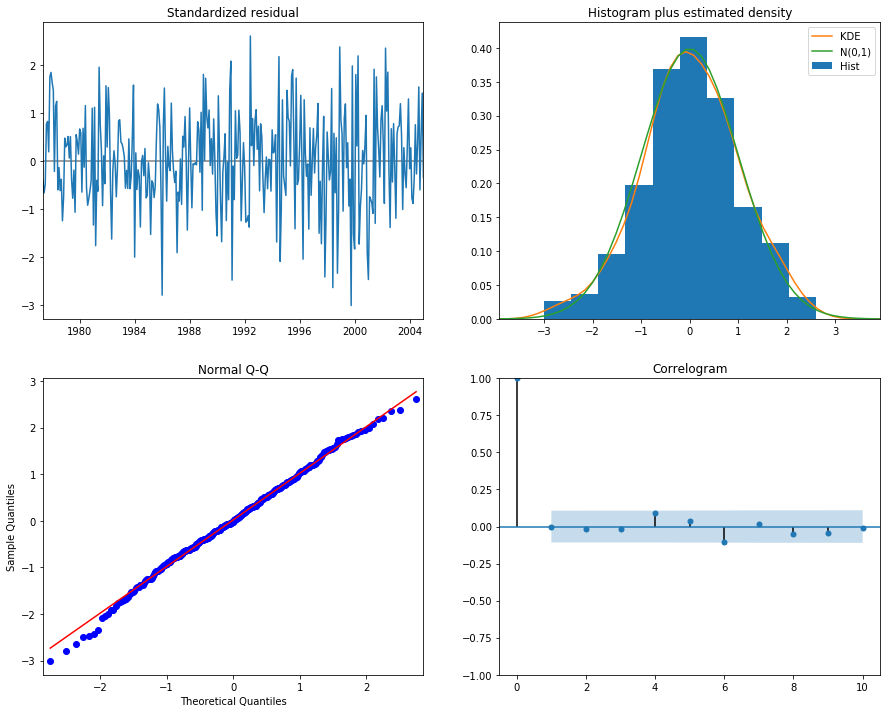

In [14]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Validating Forecasts

In [15]:
pred = results.get_prediction(start=pd.to_datetime('1973-01-01'), dynamic=False)
pred_ci = pred.conf_int()

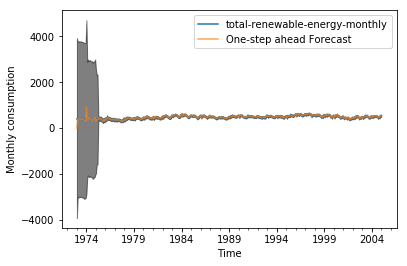

In [17]:
ax = train['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.5)

ax.set_xlabel('Time')
ax.set_ylabel('Monthly consumption')
plt.legend()

plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = train.iloc[:,0]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1633.11


In [21]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1973-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

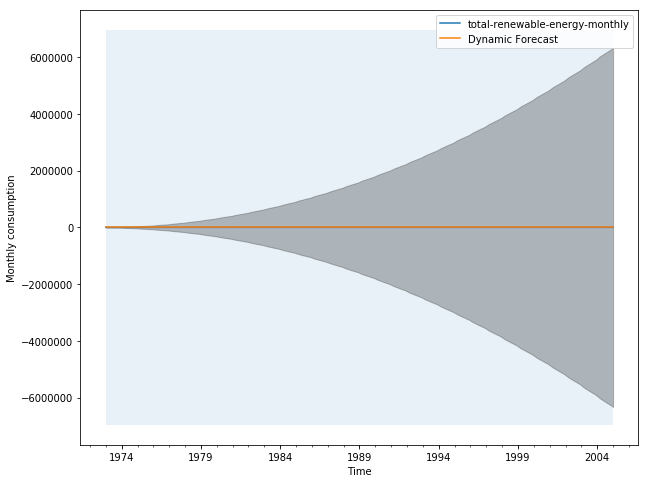

In [23]:
ax = train['1973':].plot(label='observed', figsize=(10, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1973-01-01'), train.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time')
ax.set_ylabel('Monthly consumption')

plt.legend()
plt.show()

In [26]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = train.iloc[:,0]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 236181.55


## Producing and Visualizing Forecasts

In [30]:
# Get forecast
pred_uc = results.get_forecast(steps=163)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

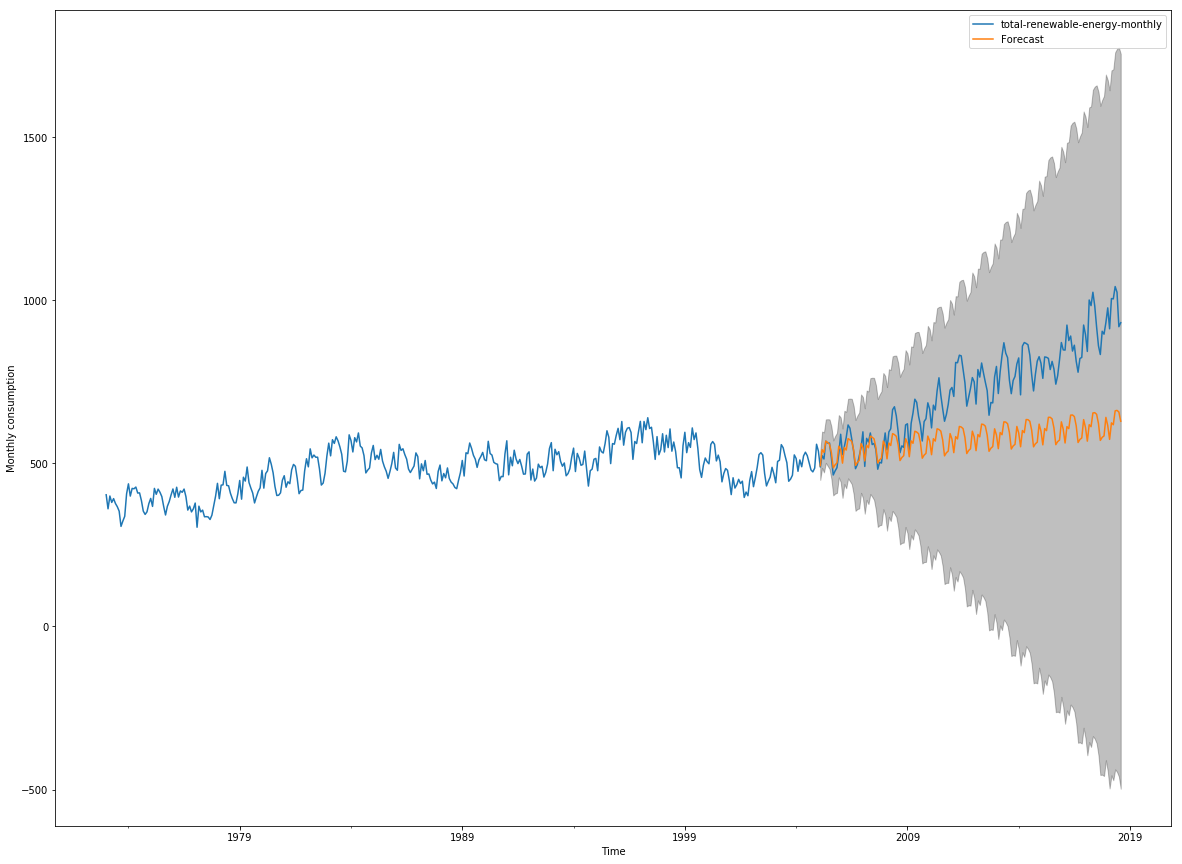

In [32]:
ax = df1.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time')
ax.set_ylabel('Monthly consumption')

plt.legend()
plt.show()